In [1]:
library(FateID)
library(Seurat)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
Attaching SeuratObject

'SeuratObject' was built with package 'Matrix' 1.6.1.1 but the current
version is 1.6.4; it is recomended that you reinstall 'SeuratObject' as
the ABI for 'Matrix' may have changed



In [64]:
sessionInfo()

R version 4.2.0 (2022-04-22)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /cluster/home/yingjun/miniconda3/envs/sc182/lib/libopenblasp-r0.3.21.so

locale:
[1] C

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] SeuratObject_4.1.4 Seurat_4.4.0       FateID_0.2.2      

loaded via a namespace (and not attached):
  [1] Rtsne_0.17             colorspace_2.1-0       deldir_1.0-6          
  [4] ggridges_0.5.6         som_0.3-5.1            IRdisplay_1.1         
  [7] base64enc_0.1-3        spatstat.data_3.0-4    farver_2.1.1          
 [10] leiden_0.4.3.1         listenv_0.9.1          ggrepel_0.9.5         
 [13] RSpectra_0.16-1        fansi_1.0.3            codetools_0.2-19      
 [16] splines_4.2.0          polyclip_1.10-6        IRkernel_1.3          
 [19] jsonlite_1.8.7         umap_0.2.10.0          ica_1.0-3             
 [22] clust

# DATA IN
## Use HVG

In [13]:
data <- readRDS('./write/c25Leuko.hvg.seurat.rds')

In [14]:
meta <- read.csv('./Files/c25Leuko.hvg_obs.csv',row.names = 1)

In [15]:
head(meta)

,Index,Age,Development_stage,Condition,Day,Strain,Tissue,StudyID,CellType,Genotype,⋯,Leiden_sub_c27,CT_c16,CT_c27,CT_Final,EHT_num,CT_new3,EHT_tc,EHT,UMAP_1,UMAP_2
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>
H5_AGCCTAATCTGGGCCA-3,GSM4817928,4-12m,adult,Healthy,0,Zebrabow M,heart,GSE159032,All cells,WT,⋯,23,Macrophage 2,Macrophage 2,Macrophage 2,6,Macrophage 2,tc6,EHT6,6.786125,-2.1896913
H5_CATTCGCGTGTGCGTC-3,GSM4817928,4-12m,adult,Healthy,0,Zebrabow M,heart,GSE159032,All cells,WT,⋯,25,"Leiden_v2_Cluster25,1","Leiden_v2_Cluster25,1",EHT-4,4,"Leiden_v2_Cluster25,1",tc4,EHT4,7.451823,-0.1244003
H5_TACTTACTCAAGAAGT-3,GSM4817928,4-12m,adult,Healthy,0,Zebrabow M,heart,GSE159032,All cells,WT,⋯,20,Macrophage 2,Macrophage 2,Macrophage 2,6,Macrophage 2,tc6,EHT6,8.785749,-0.5882292
H5_TCAGATGCACCAGCAC-3,GSM4817928,4-12m,adult,Healthy,0,Zebrabow M,heart,GSE159032,All cells,WT,⋯,20,Macrophage 2,Macrophage 2,Macrophage 2,6,Macrophage 2,tc6,EHT6,8.911777,-1.9455942
H5_TGAAAGAAGCGCTTAT-3,GSM4817928,4-12m,adult,Healthy,0,Zebrabow M,heart,GSE159032,All cells,WT,⋯,20,Macrophage 2,Macrophage 2,Macrophage 2,6,Macrophage 2,tc6,EHT6,9.533280,-2.8265615
H6_AACTCAGTCCGATATG-3,GSM4817929,4-12m,adult,Healthy,0,Zebrabow M,heart,GSE159032,All cells,WT,⋯,20,Macrophage 2,Macrophage 2,Macrophage 2,6,Macrophage 2,tc6,EHT6,6.857444,-1.8406633


In [16]:
data

An object of class Seurat 
1360 features across 2305 samples within 1 assay 
Active assay: RNA (1360 features, 0 variable features)

In [39]:
x0 <- as.data.frame(data[['RNA']]@counts)

In [40]:
nrow(x0)

[1] 1360

In [41]:
x0 <- x0[rowSums(x0)>0,]
nrow(x0)

[1] 1359

In [42]:
head(x0[,1:5])

,H5_AGCCTAATCTGGGCCA-3,H5_CATTCGCGTGTGCGTC-3,H5_TACTTACTCAAGAAGT-3,H5_TCAGATGCACCAGCAC-3,H5_TGAAAGAAGCGCTTAT-3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
slc38a4,0,0.0000000,0,0.0000000,0.0000000
mrpl42,0,0.0000000,0,0.0000000,0.0000000
csrp2,0,0.0000000,0,0.7380356,0.0000000
pik3cg,0,0.0000000,0,0.0000000,0.0000000
cd9b,0,0.0000000,0,0.0000000,0.0000000
coa6,0,0.3817133,0,0.0000000,0.8194259


In [43]:
colnames(data@meta.data)

[1] "orig.ident"                  "nCount_RNA"                 
 [3] "nFeature_RNA"                "Index"                      
 [5] "Age"                         "Development_stage"          
 [7] "Condition"                   "Day"                        
 [9] "Strain"                      "Tissue"                     
[11] "StudyID"                     "CellType"                   
[13] "Genotype"                    "Organism"                   
[15] "Gender"                      "Author"                     
[17] "n_genes"                     "n_genes_by_counts"          
[19] "log1p_n_genes_by_counts"     "total_counts"               
[21] "log1p_total_counts"          "pct_counts_in_top_50_genes" 
[23] "pct_counts_in_top_100_genes" "pct_counts_in_top_200_genes"
[25] "pct_counts_in_top_500_genes" "total_counts_mt"            
[27] "log1p_total_counts_mt"       "pct_counts_mt"              
[29] "batch"                       "n_counts"                   
[31] "phase"                       "S_score"                    
[33] "G2M_score"                   "EGFP"                       
[35] "FishID"                      "Treatment"                  
[37] "RFP"                         "db_scores"                  
[39] "FishID_new"                  "CellID"                     
[41] "Cell"                        "percent.mito"               
[43] "time"                        "morphine"                   
[45] "AV"                          "inhib"                      
[47] "so.far.ident.subtypes"       "so.far.ident"               
[49] "RNA_snn_res.4"               "seurat_clusters"            
[51] "work.ident"                  "fibro.subtypes"             
[53] "is.inhib"                    "split.inhib"                
[55] "zoom.ident"                  "zoom.subtypes"              
[57] "plot.ident"                  "CM.ident"                   
[59] "paper.ident"                 "RNA_snn_res.2"              
[61] "RNA_snn_res.3"               "RNA_snn_res.3.5"            
[63] "work.ident2"                 "work.ident3"                
[65] "final.zoom"                  "lineage.ident"              
[67] "Cell_type"                   "Cell_name"                  
[69] "Citrine"                     "DsRedEx"                    
[71] "Title"                       "Leiden_v1"                  
[73] "Leiden_v2"                   "leiden_R"                   
[75] "CT_new1"                     "CT_new2"                    
[77] "Leiden_sub_c16"              "Leiden_sub_c16_5"           
[79] "Leiden_sub_c27"              "CT_c16"                     
[81] "CT_c27"                      "CT_Final"                   
[83] "EHT_num"                     "CT_new3"                    
[85] "EHT_tc"                      "EHT"                        
[87] "UMAP_1"                      "UMAP_2"

In [44]:
table(meta$EHT_num)


   1    2    3    4    5    6 
 123  379   98  309 5503 1256 

In [45]:
table(meta$CT_new2)


Leiden_v2_Cluster25,0 Leiden_v2_Cluster25,1 Leiden_v2_Cluster25,2 
                  379                   309                    98 
Leiden_v2_Cluster25,3          Macrophage 2               T-cells 
                  123                  1256                  5503 

In [46]:
nrow(meta)

[1] 7668

# Use leiden

In [17]:
#umap = as.matrix(meta[,c('UMAP1','UMAP2')])
umap = as.matrix(meta[,c('UMAP_1','UMAP_2')])

In [18]:
data@meta.data<-meta
data[['umap']]<-CreateDimReducObject(umap,key='UMAP')

Warning message:
"No assay specified, setting assay as RNA by default."
Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from UMAP to UMAP_"
Warning message:
"All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to UMAP_"


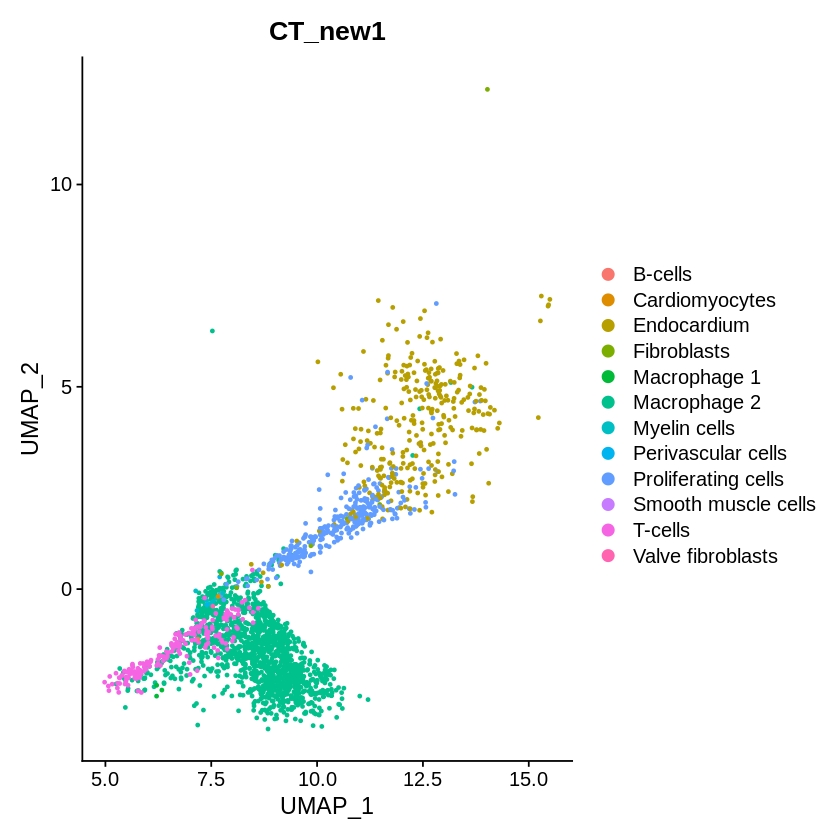

In [19]:
DimPlot(data,group.by = 'CT_new1',label = F,label.size = 8)

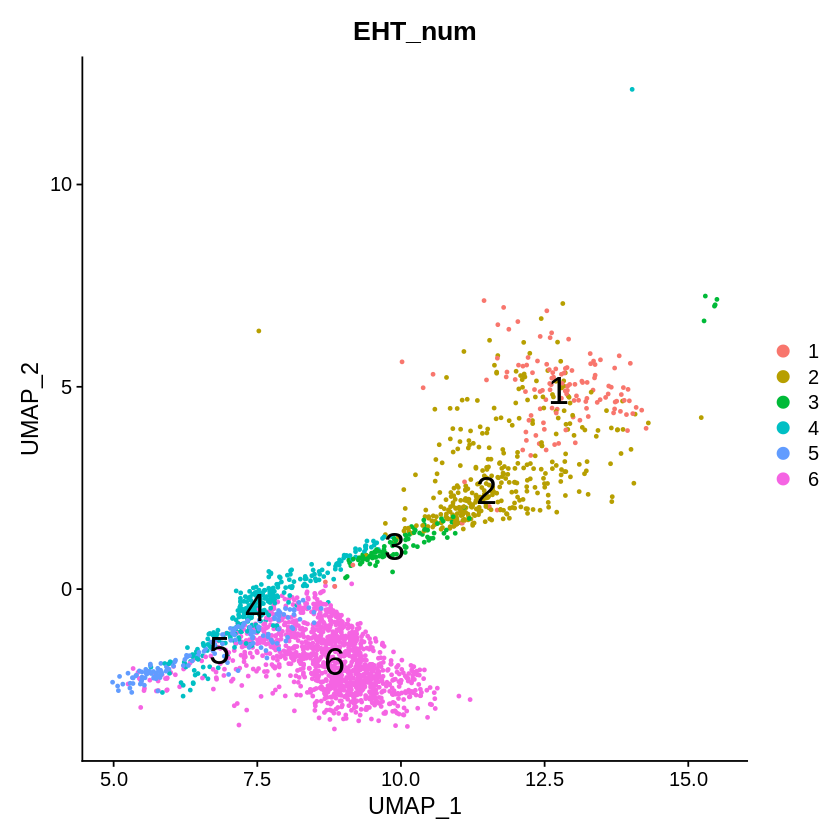

In [20]:
DimPlot(data,group.by = 'EHT_num',label = T,label.size = 8)

In [24]:
# Set T-cells and Mac 1 as terminal clusters
# data@meta.data[data@meta.data$CT_new1=='T-cells','EHT_num']=5
# data@meta.data[data@meta.data$CT_new1=='Macrophage 1','EHT_num']=6

In [21]:
# y,tar must be positive integers
# len(tar) must >2, or get: dim(X) must have a positive length
y <- data@meta.data$EHT_num
names(y)<-rownames(meta)
head(y)
table(y)
tar <- c(5,6)
tar

H5_AGCCTAATCTGGGCCA-3 H5_CATTCGCGTGTGCGTC-3 H5_TACTTACTCAAGAAGT-3 
                    6                     4                     6 
H5_TCAGATGCACCAGCAC-3 H5_TGAAAGAAGCGCTTAT-3 H6_AACTCAGTCCGATATG-3 
                    6                     6                     6

y
   1    2    3    4    5    6 
 123  379   98  309  140 1256 

[1] 5 6

In [52]:
# Use hvg
x <- x0

In [53]:
nrow(x)

[1] 1359

In [54]:
ncol(x)

[1] 7668

# Compute Fate Bias

In [55]:
# Takes long for large matrix
fb  <- fateBias(x, y, tar, 
                z=NULL, minnr=5, minnrh=10, adapt=TRUE, confidence=0.75, nbfactor=5, 
                use.dist=FALSE, seed=12345, nbtree=NULL) #minnr 5, minnrh 10

In [56]:
saveRDS(fb,'./Files/c25Leuko_wt_fb_hvg.rds')

In [63]:
write.csv(fb$probs,'./Files/c25Leuko_wt_fb_hvg.csv')

In [22]:
fb = readRDS('./Files/c25Leuko_wt_fb_hvg.rds')

In [23]:
dr <- list(umap=list(D2=data.frame(V1=meta$UMAP_1,V2=meta$UMAP_2,row.names = rownames(meta))))

In [24]:
table(y)

y
   1    2    3    4    5    6 
 123  379   98  309  140 1256 

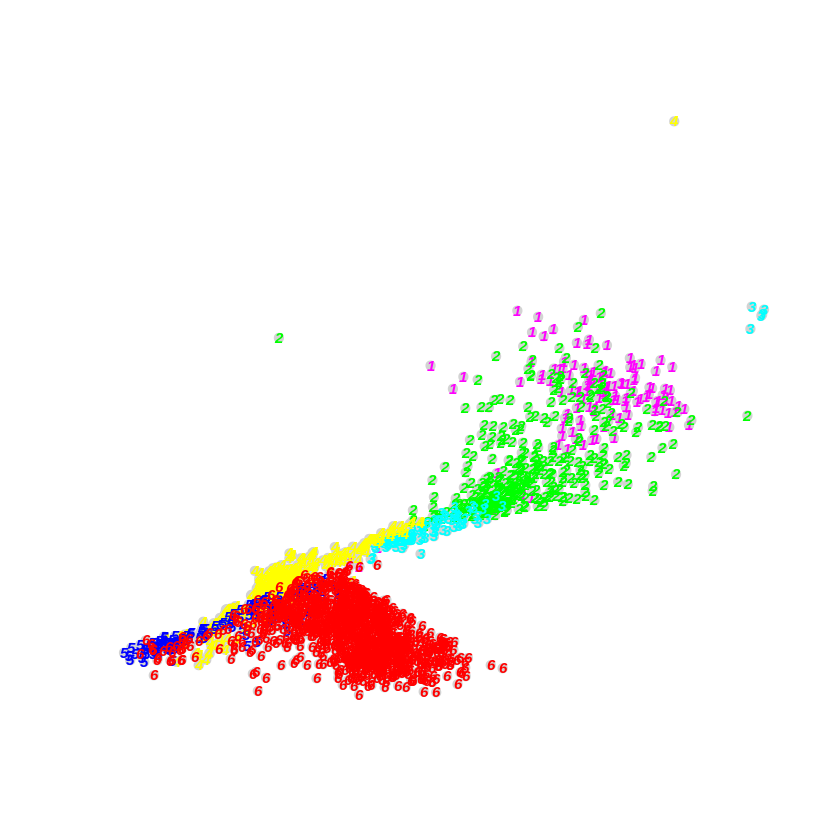

In [25]:
plotFateMap(y,dr,k=2,m="umap")

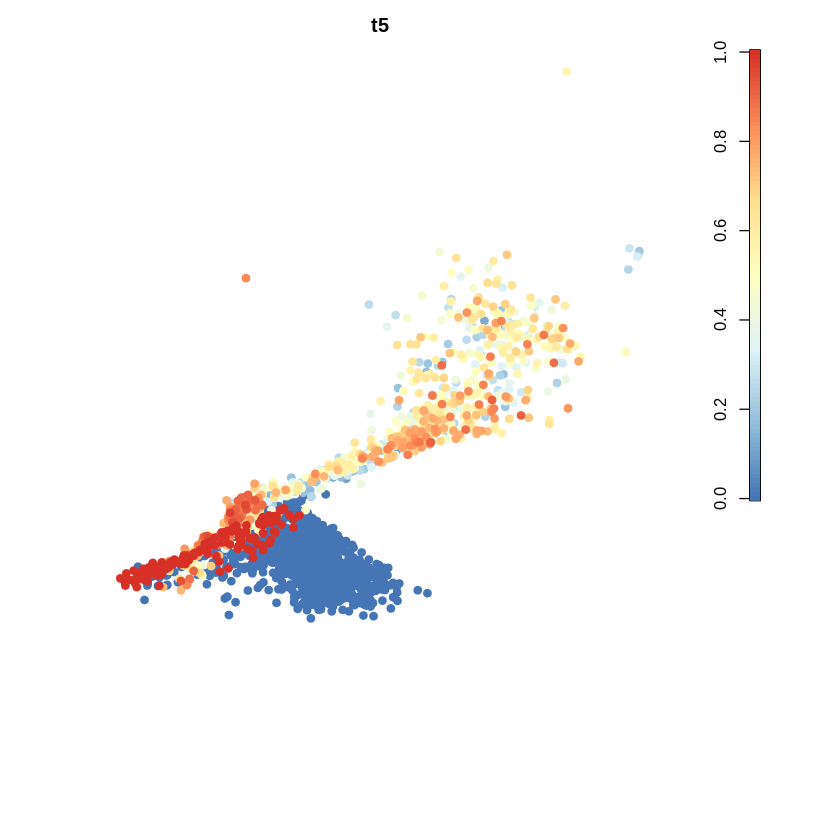

In [26]:
plotFateMap(y,dr,k=2,m="umap",fb=fb,g="t5")

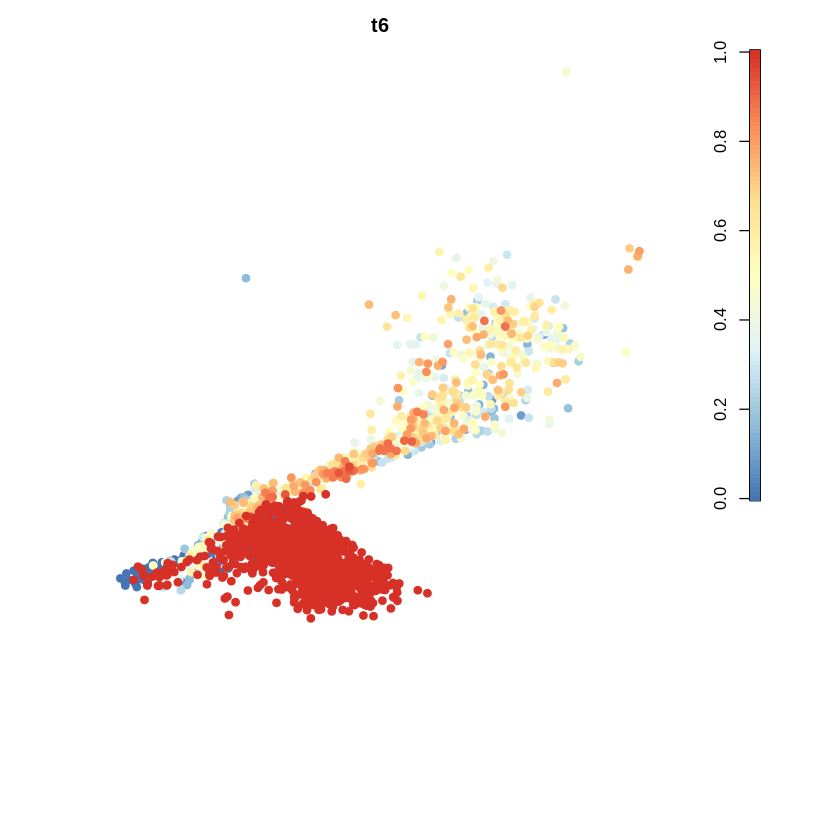

In [27]:
plotFateMap(y,dr,k=2,m="umap",fb=fb,g="t6")

In [28]:
# g:genes, n:title
plotFateMap(y, dr, k=2, m="umap", g=c("pcna"), n="pcna",x=x)

ERROR: Error in apply(x[g, ], 2, sum): object 'x' not found


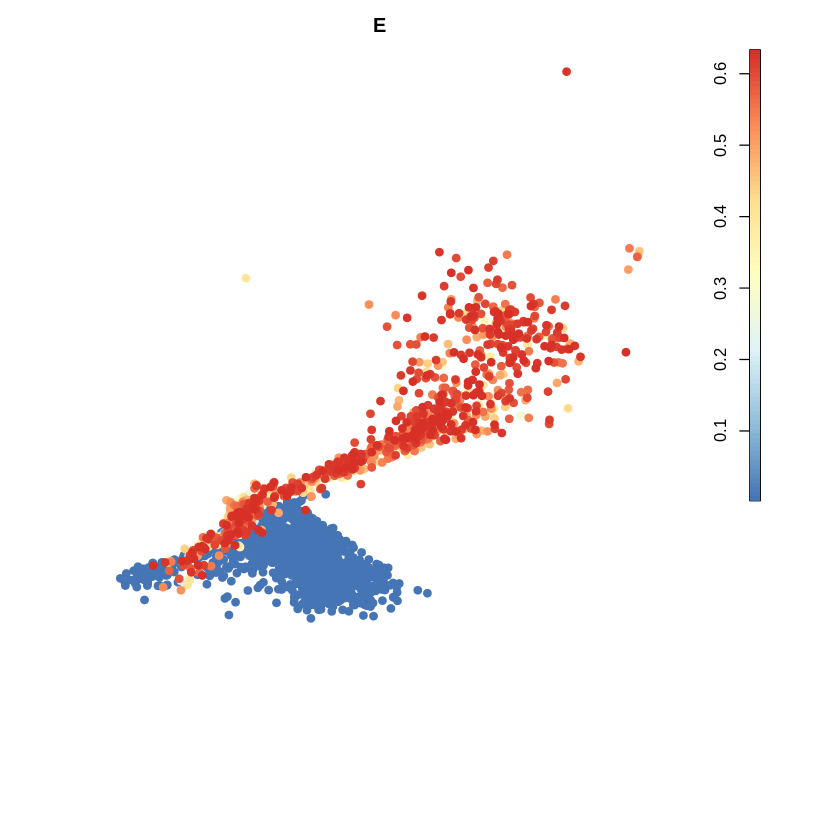

In [29]:
E <- plotFateMap(y,dr,k=2,m="umap",g="E",fb=fb)

In [32]:
E_df <- data.frame(E)

In [36]:
write.csv(E_df,'./Files/Entropy_c25Leuko_wt_fb_hvg.csv')

# Pseudotime nodes

## Attempt 1: Use hvg

In [275]:
# Returns all cells along a differentiation trajectory in pseudo-temporal order
pr  <- prcurve(y,fb,dr,k=2,m="umap",trthr=0.33,start=3)

In [276]:
n <- pr$trc[["t5"]]

In [277]:
# Self organizing map
s1d <- getsom(x,nb=50,alpha=.5) # nb:number of nodes; alpha: local regression smoothing parameter

In [278]:
ps  <- procsom(s1d,corthr=.85,minsom=3)

In [279]:
saveRDS(s1d,'./Files/c25Leuko_wt_s1d_hvg.rds')
saveRDS(ps,'./Files/c25Leuko_wt_ps_hvg.rds')

In [280]:
s1d <- readRDS('./Files/c25Leuko_wt_s1d_hvg.rds')
ps <- readRDS('./Files/c25Leuko_wt_ps_hvg.rds')

In [281]:
fcol <- sample(rainbow(max(y)))

In [282]:
ncol(ps$nodes.z)

[1] 2305

In [283]:
table(y)

y
   1    2    3    4    5    6 
 123  379   98  309  140 1256 

In [284]:
table(y[n])


  1   2   3   4   5 
108 316  47 261 140 

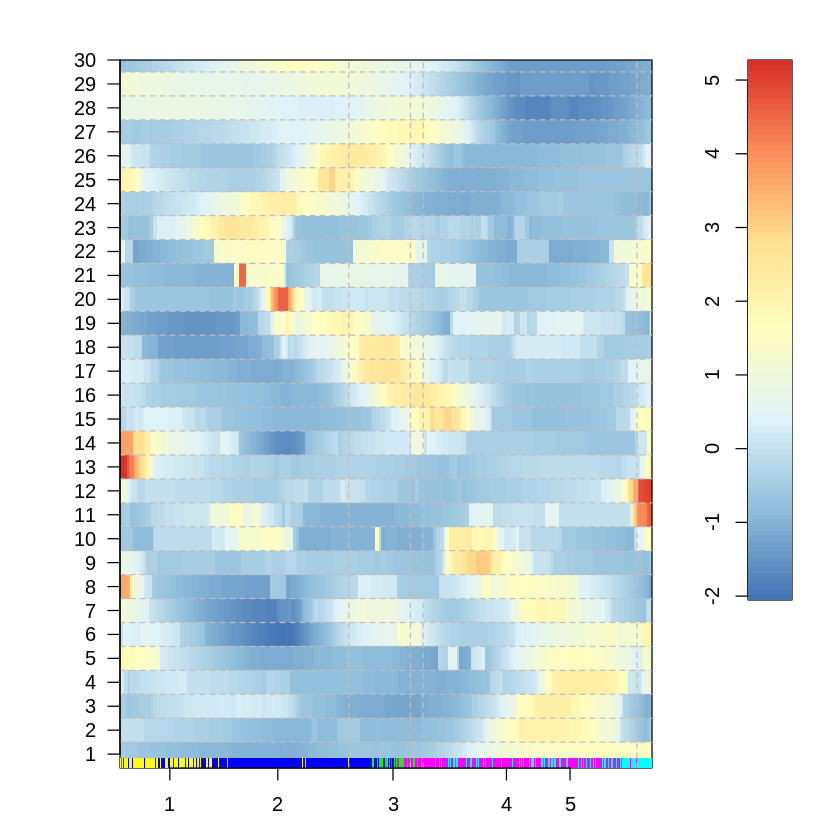

In [285]:
# showing modules
# y: modules; x: cluster along trajectory? label for average position?
plotheatmap(ps$nodes.z, xpart=y[n], xcol=fcol, ypart=unique(ps$nodes), 
            xgrid=T, 
            ygrid=T, 
            xlab=T)

### Check key genes

In [202]:
# Specific modules
g <- names(ps$nodes)[ps$nodes == 4]

In [203]:
head(g)

[1] "dgkza"   "hspb8"   "akap12b" "ddit4"   "grasp"   "tmem88a"

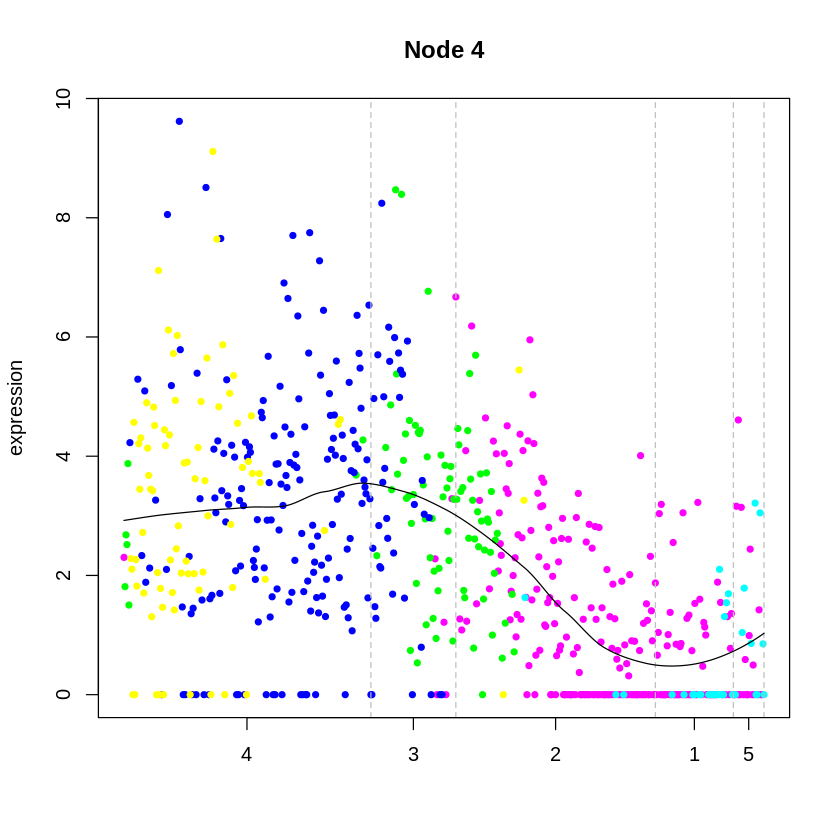

In [204]:
plotexpression(x, y, g, n, col=fcol, name="Node 4", 
               cluster=T, cex=1,
               alpha=.5, types=NULL) #alpha: parameters for loess

In [208]:
g <- names(ps$nodes)[ps$nodes == 27]

In [209]:
head(g)

[1] "irak3"    "ehbp1l1a" "mrpl52"   "sox6"     "tssc4"    "brd7"

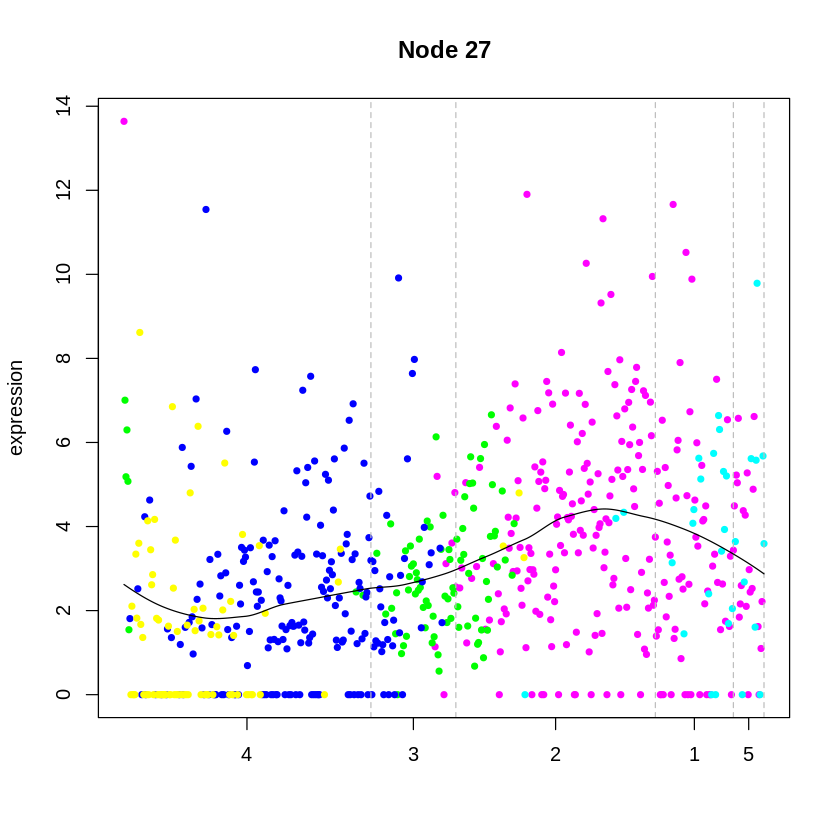

In [210]:
plotexpression(x, y, g, n, col=fcol, name="Node 27", 
               cluster=T, cex=1,
               alpha=.5, types=NULL) #alpha: parameters for loess

## Attempt 2: Use all genes + filtering

In [44]:
data0 <- readRDS('./write/Batch1.seurat.rds')

In [45]:
x_full <- data0[['RNA']]@counts

In [46]:
nrow(x_full)

[1] 16164

In [55]:
pr  <- prcurve(y,fb,dr,k=2,m="umap",trthr=0.33,start=3)

In [96]:
n <- pr$trc[["t9"]]

In [49]:
fs  <- filterset(x_full,n=n,minexpr=2,minnumber=1)

In [50]:
nrow(fs)

[1] 13007

In [51]:
length(intersect(rownames(fs),rownames(x)))

[1] 4172

In [52]:
s1d <- getsom(fs,nb=50,alpha=.5)

In [53]:
ps  <- procsom(s1d,corthr=.85,minsom=3)

In [58]:
saveRDS(s1d,'./Files/Batch1_s1d_full.rds')
saveRDS(ps,'./Files/Batch1_ps_full.rds')

In [134]:
s1d <- readRDS('./Files/Batch1_s1d_full.rds')
ps <- readRDS('./Files/Batch1_ps_full.rds')

In [101]:
fcol <- sample(rainbow(max(y)))

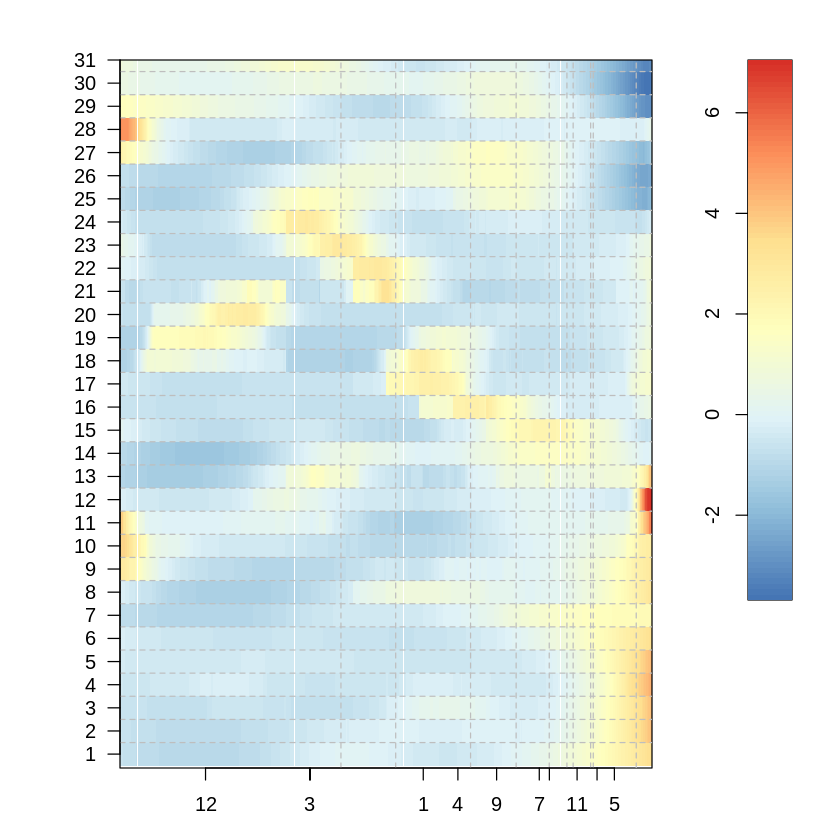

In [103]:
plotheatmap(ps$nodes.z, xpart=y[n], xcol=fcol, ypart=unique(ps$nodes), 
            xgrid=T, 
            ygrid=T, 
            xlab=T)

### Check key genes

In [138]:
# Specific modules
g <- names(ps$nodes)[ps$nodes == 27]

In [139]:
head(g)

[1] "Tcf24"  "Imp4"   "Actr1b" "Cnot11" "Ormdl1" "Coq10b"

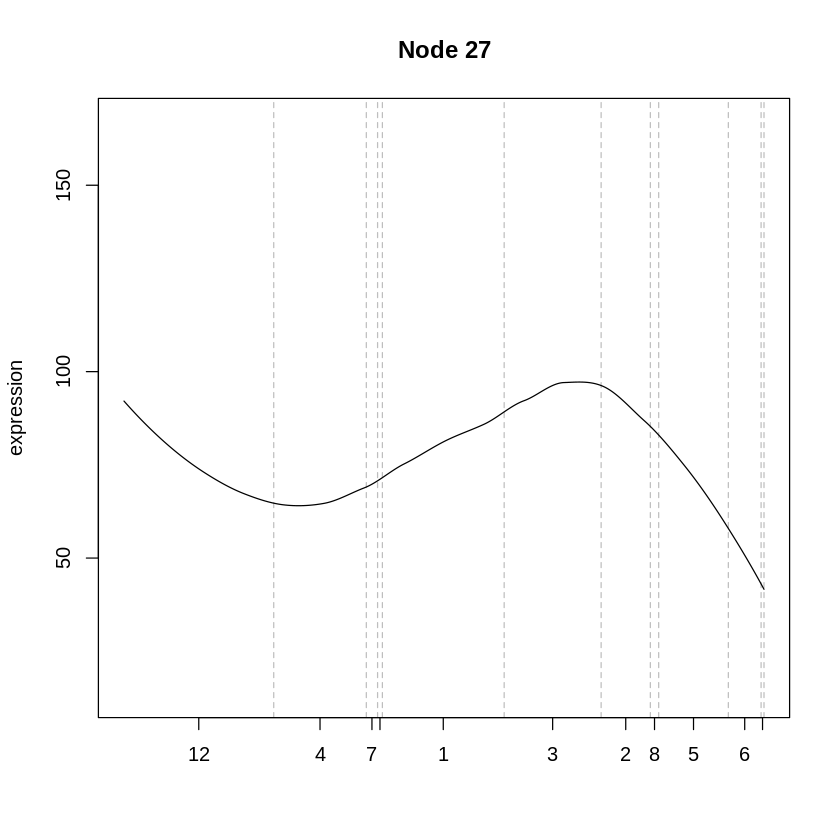

In [140]:
plotexpression(fs, y, g, n, col=fcol, name="Node 27", 
               cluster=T, cex=1,
               alpha=.5, types=NULL) #alpha: parameters for loess

In [145]:
g <- names(ps$nodes)[ps$nodes == 16]

In [146]:
head(g)

[1] "2610203C22Rik" "Msc"           "Tex30"         "Ercc5"        
[5] "Speg"          "Gm16025"

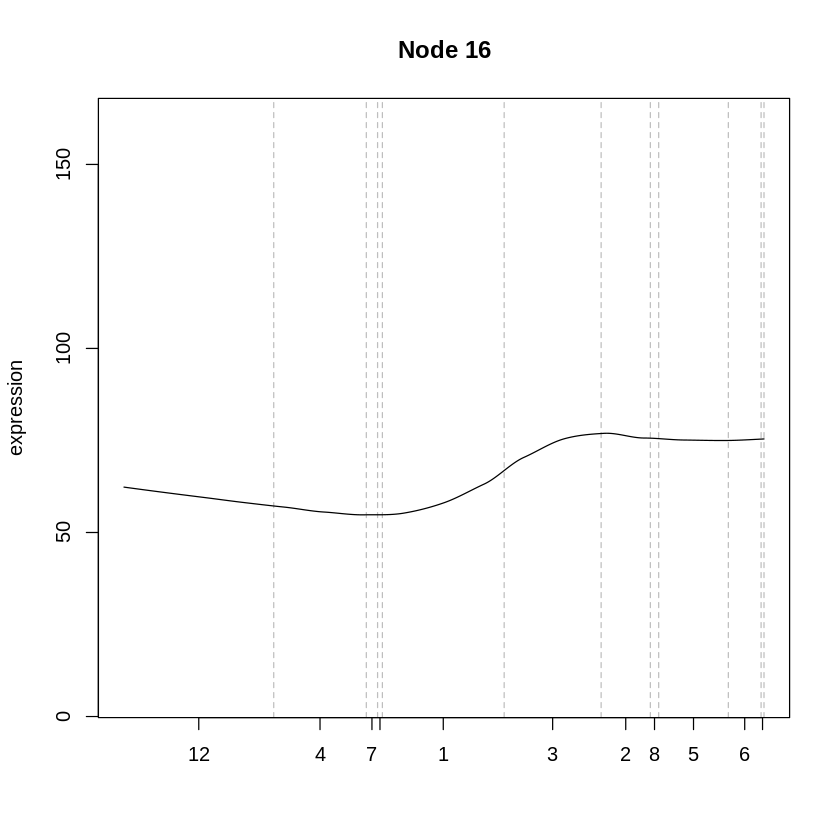

In [147]:
plotexpression(fs, y, g, n, col=fcol, name="Node 16", 
               cluster=T, cex=1,
               alpha=.5, types=NULL) #alpha: parameters for loess

# Inspecting fate bias of gene expression

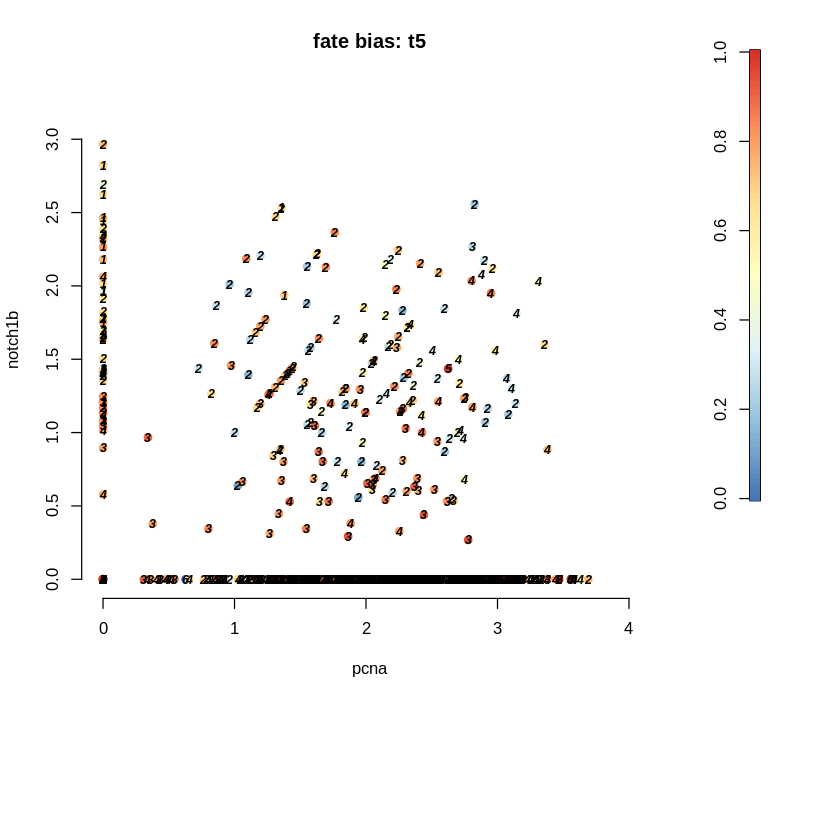

In [228]:
# Plot 2 genes against each other
gene2gene(x,y, "pcna", "notch1b",fb=fb,tn="t5")

In [227]:
rownames(x)[grepl('notch',rownames(x))]

[1] "notch1b" "notch3"

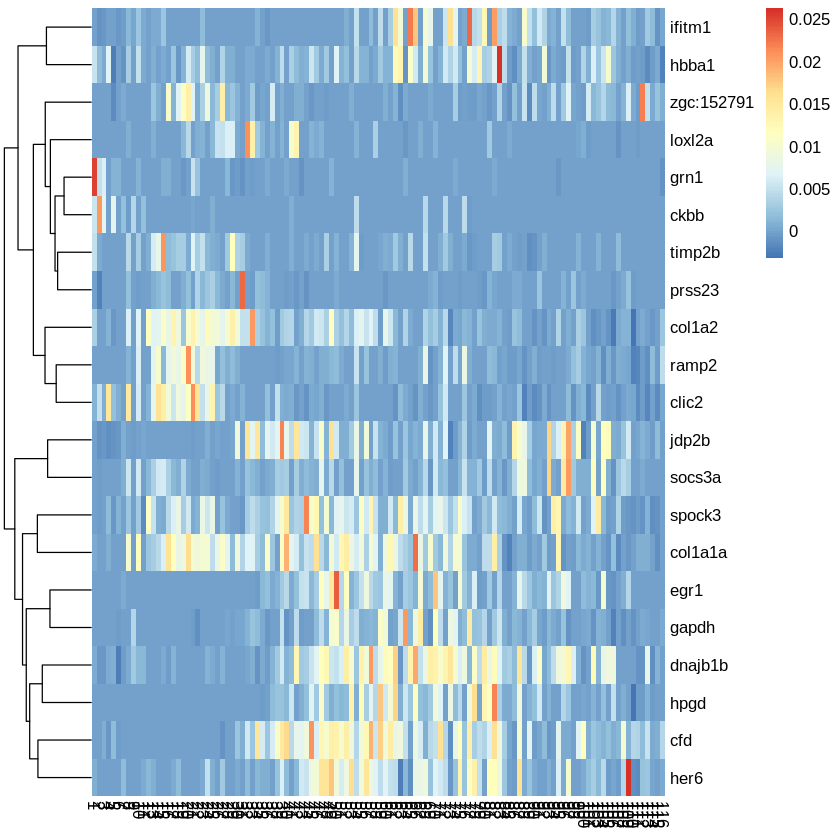

In [286]:
# Genes important in fate decision
k <- impGenes(fb,"t5")

In [236]:
rownames(k$de)

[1] "anxa2a"   "egr1"     "vmp1"     "c7a"      "klf2a"    "serpine1"
 [7] "cxcl18b"  "fosl1a"   "jun"      "dnajb1b"  "mycb"     "junba"   
[13] "notch1b"  "jdp2b"    "socs3a"

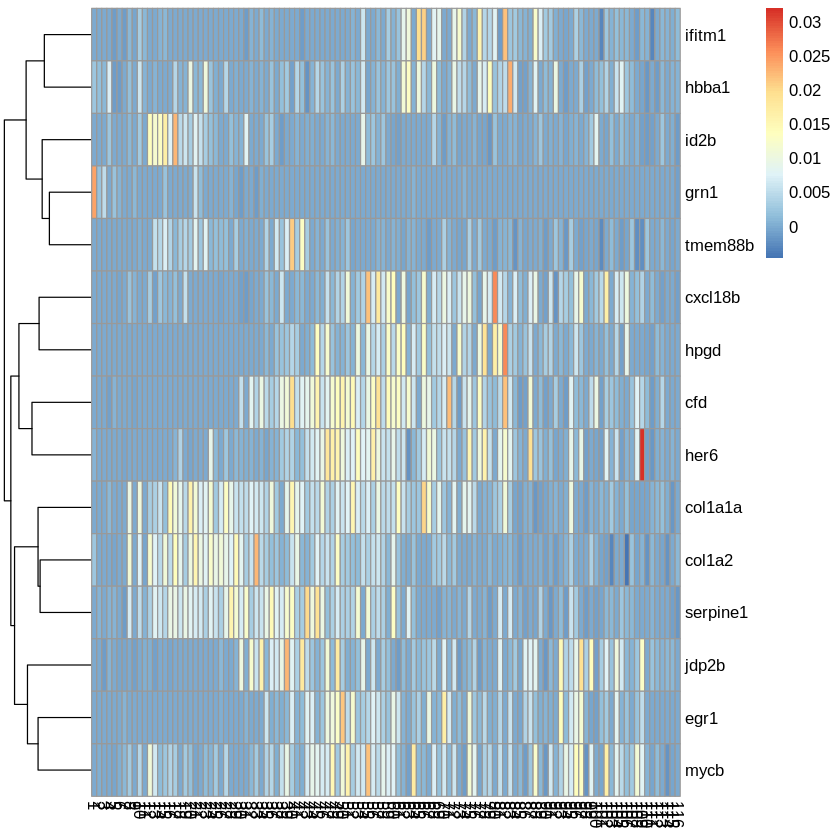

In [287]:
# Genes important in fate decision
k6 <- impGenes(fb,"t6")

In [ ]:
# g:genes, n:title
for(gn in rownames(k$d)){
    plotFateMap(y, dr, k=2, m="umap", g=gn, n=gn,x=x)
}